In [ ]:
%pip install simpleaudio

# Generación del algoritmo de Huffman

In [2]:
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
         
    return codes        

""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    #print("Space usage before compression (in bits):", before_compression)    
    #print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    #print("symbols: ", symbols)
    #print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
    
    huffman_encoding = Calculate_Codes(nodes[0])
    #print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0],huffman_encoding
    


def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string  

## Codificando el mensaje y la imagen usando la codificación de Huffman

In [12]:
print ("\n\n.............CODIFICANDO............\n\n")


# print("Encoded output", encodeText)
# print("Decoded Output", Huffman_Decoding(encodeText,tree1))

from skimage import io
import matplotlib.pyplot as plt
import numpy as np

image=io.imread("img_house.jpeg")

#print("Dimensiones de la imagen:")
#print(image.shape)

r=image[:,:,0]
g=image[:,:,1]
b=image[:,:,2]

img_g=g
#Reduccion de la dimensionalidad de la imagen
min=img_g.min()
max=img_g.max()
diferencia=31
img_g_adj=np.zeros(np.shape(img_g),dtype=int)

for i in range(len(img_g_adj)):
    for j in range(len(img_g_adj[i])):
        img_g_adj[i,j]= int((diferencia)*(img_g[i,j]- min)/(max-min))
#Reescalando
img_g_final=np.zeros(np.shape(img_g_adj),dtype=int) 
for i in range(len(img_g_adj)):
    for j in range(len(img_g_adj[i])):
        img_g_final[i,j]=int(img_g_adj[i,j]*(max-min)/diferencia + min)

img_b=b
min=img_b.min()
max=img_b.max()

img_b_adj=np.zeros(np.shape(img_b),dtype=int)

for i in range(len(img_b_adj)):
    for j in range(len(img_b_adj[i])):
        img_b_adj[i,j]= int((diferencia)*(img_b[i,j]- min)/(max-min))

img_b_final=np.zeros(np.shape(img_b_adj),dtype=int)
for i in range(len(img_b_adj)):
    for j in range(len(img_b_adj[i])):
        img_b_final[i,j]=int(img_b_adj[i,j]*(max-min)/diferencia + min)


img_r=r
min=img_r.min()
max=img_r.max()

img_r_adj=np.zeros(np.shape(img_r),dtype=int)

for i in range(len(img_r_adj)):
    for j in range(len(img_r_adj[i])):
        img_r_adj[i,j]= int((diferencia)*(img_r[i,j]- min)/(max-min))


img_r_final=np.zeros(np.shape(img_r_adj),dtype=int)
for i in range(len(img_r_adj)):
    for j in range(len(img_r_adj[i])):
        img_r_final[i,j]=int(img_r_adj[i,j]*(max-min)/diferencia + min)


#La matriz se transforma a dimensionalidad 1
img_r_final=img_r_final.flatten().tolist()
img_r_final=[ str(e)+" " for e in img_r_final]

img_b_final=img_b_final.flatten()
img_b_final=[ str(e)+" " for e in img_b_final]
img_g_final=img_g_final.flatten()
img_g_final=[ str(e)+" " for e in img_g_final]



def fsk(imagen):  
    encoding, tree,dic=Huffman_Encoding(imagen)
    # print("Encoded output", encoding)
    # print("Decoded Output", Huffman_Decoding(encoding,tree))
    dic_freq={}
    frq=200 #Frecuencia de inicio
    frecdev=50 #Separación entre cada elemento en frecuencia
    for llave in dic.keys():
        dic_freq[dic[llave]]=frq
        frq+=frecdev
    pos=0
    lista_freq=[]
    while len(encoding)>pos:
        for llave in dic_freq.keys():
            largo=len(llave)
            # a=encoding1[pos:largo+pos]
            if encoding[pos:largo+pos]==llave:
                lista_freq.append(dic_freq[llave])
                pos+=largo
                break

    return lista_freq,encoding,tree,dic

codes={}
lista_freq_r,encoding_r, tree_r,dic_r=fsk(img_r_final)
codes={}
lista_freq_g,encoding_g, tree_g,dic_g=fsk(img_g_final)
codes={}
lista_freq_b,encoding_b, tree_b,dic_b=fsk(img_b_final)
codes={}


#msn="holo  aa"
msn= ": ¡Proyecto Numero 2, Principios de Comunicaciones Otoño 2022 EL4112!"
codes={}
list_freq_text,encodeText, tree_text,dic_text=fsk(msn)
print(len(list_freq_text))
print(len(lista_freq_r))





.............CODIFICANDO............


69
50625


# Generación de los audios

## Mensaje:  ¡Proyecto Numero 2, Principios de Comunicaciones Otoño 2022 EL4112! Modulación digital M-FSK.

In [11]:
import numpy as np

import simpleaudio as sa
note=[]
for x in list_freq_text:

    fs = 44100  # 44100 samples per second
    seconds = 0.02 
    # Generate array with seconds*sample_rate steps, ranging between 0 and seconds
    t = np.linspace(0, seconds, int(seconds * fs),False,dtype=float)
    note.append(np.sin(x * t * 2 * np.pi))


note=np.array(note)
# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)
# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)
# Wait for playback to finish before exiting
play_obj.wait_done()

[ 500.  500.  500. ... 1500. 1500. 1500.]


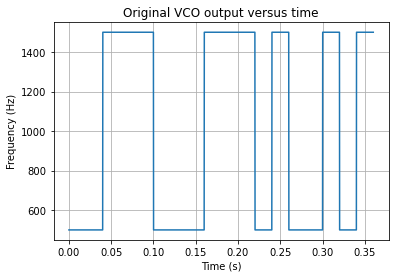

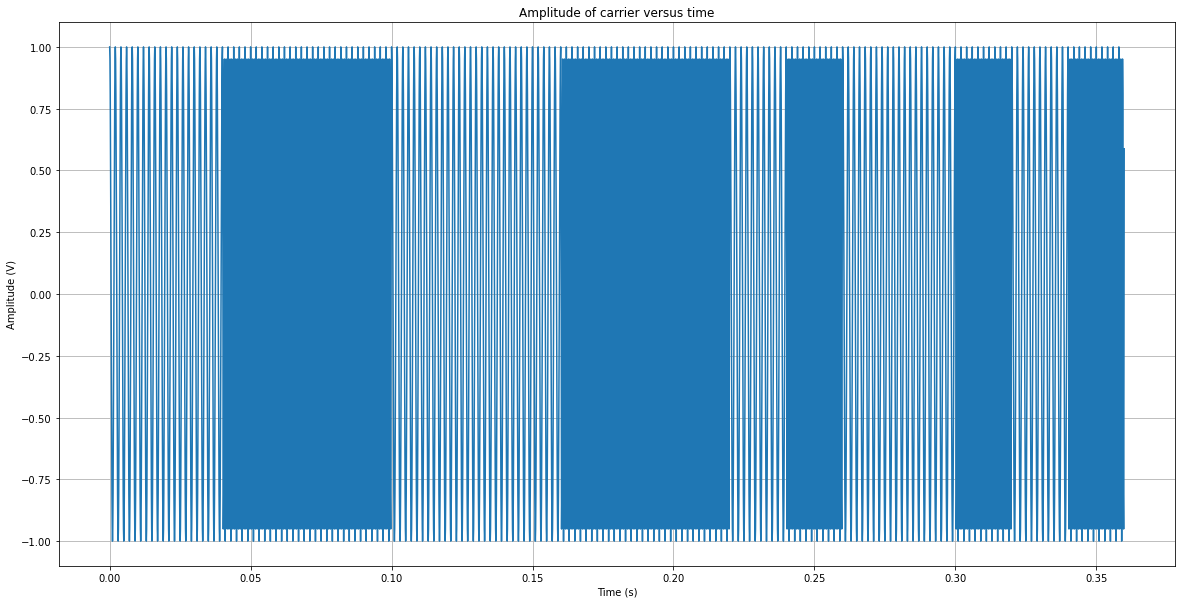

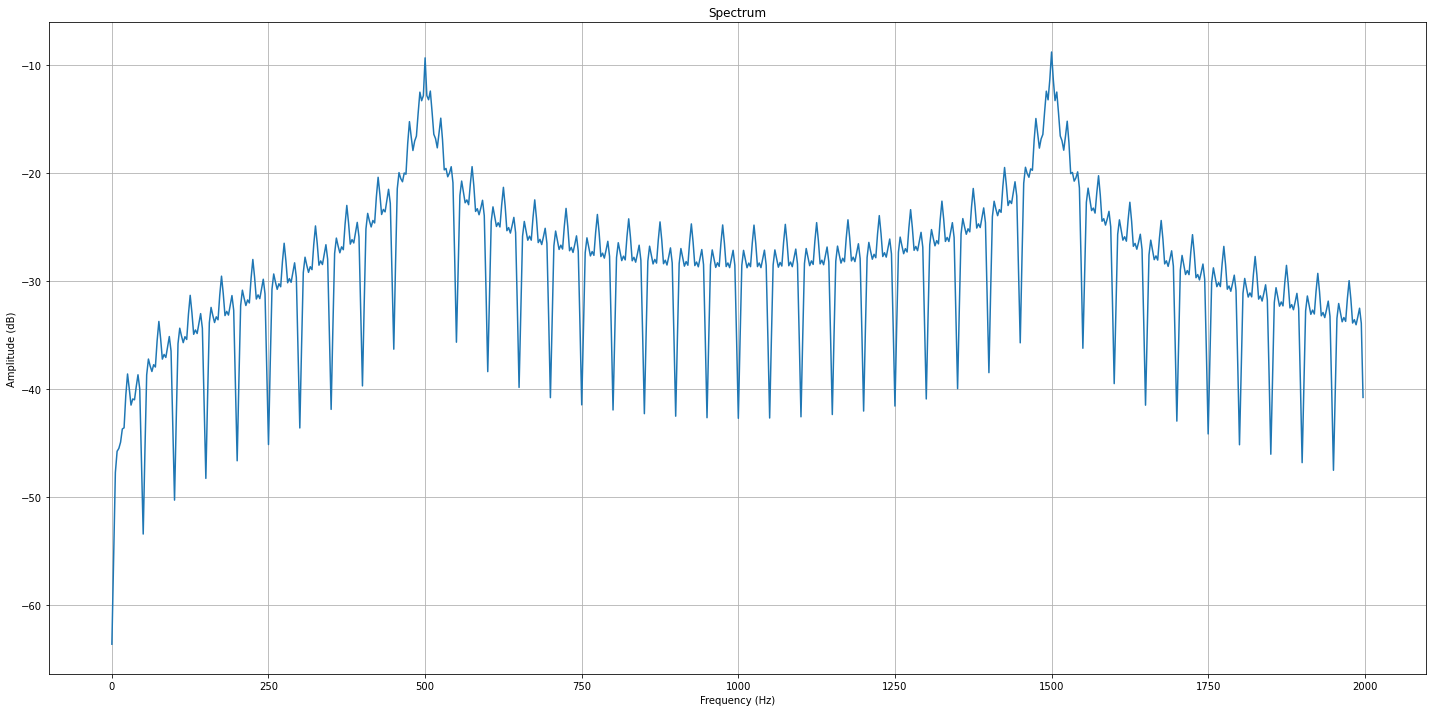

In [38]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = len(encodeText)         #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.1       #noise peak amplitude
N_prntbits = 200 #number of bits to print in plots

"""
Data in
"""
#generate some random data for testing
data_in=[int(char) for char in encodeText]

"""
VCO
"""
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 1:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc-Fdev)))
#calculate the output of the VCO
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))


def plot_data(y):
    #view the data in time and frequency domain
    #calculate the frequency domain for viewing purposes
    N_FFT =len(y)
    f = np.arange(0,Fs/2,Fs/N_FFT)
    w = np.hanning(len(y))
    y_f = np.fft.fft(np.multiply(y,w))
    y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))
    print(m)
    #pl.subplot(3,1,1)
    pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
    pl.xlabel('Time (s)')
    pl.ylabel('Frequency (Hz)')
    pl.title('Original VCO output versus time')
    pl.grid(True)
    
    pl.show()
    #pl.subplot(3,1,2)
    plt.figure(figsize=(20,10))
    pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
    pl.xlabel('Time (s)')
    pl.ylabel('Amplitude (V)')
    pl.title('Amplitude of carrier versus time')
    pl.grid(True)
    
    pl.show()
    #pl.subplot(3,1,3)
    plt.figure(figsize=(20,10))
    pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Amplitude (dB)')
    pl.title('Spectrum')
    pl.grid(True)
    pl.tight_layout()
    pl.show()

plot_data(y)
    


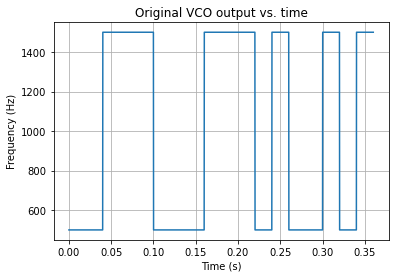

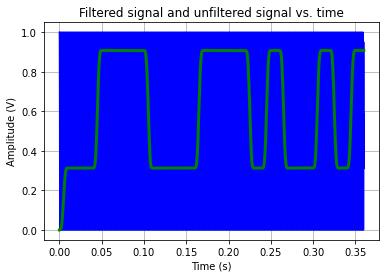

TypeError: slice indices must be integers or None or have an __index__ method

In [39]:
"""
Differentiator
"""
y_diff = np.diff(y,1)

"""
Envelope detector + low-pass filter
"""
#create an envelope detector and then low-pass filter
y_env = np.abs(sigtool.hilbert(y_diff))
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)
#view the data after adding noise
N_FFT = float(len(y_filtered))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y_filtered))
y_f = np.fft.fft(np.multiply(y_filtered,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))


pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO output vs. time')
pl.grid(True)
pl.show()

pl.plot(t[0:int(Fs*N_prntbits/Fbit)],np.abs(y[0:int(Fs*N_prntbits/Fbit)]),'b')
pl.plot(t[1:Fs*int(N_prntbits/Fbit)],y_filtered[0:Fs*int(N_prntbits/Fbit)],'g',linewidth=3.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and unfiltered signal vs. time')
pl.grid(True)
pl.show()

pl.plot(f[0:(Fc+Fdev*2)*N_FFT/Fs],y_f[0:(Fc+Fdev*2)*N_FFT/Fs])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()
pl.show()